# Climatology and NDJF 2015-16 Anomalies

The purpose of this notebook is to plot the climatology of rainfall and circulation patterns, and to plot the anomalies that occurred during NDJF 2015-16.

In [1]:
import numpy as np
import xarray as xr
import calendar
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import paraguayfloodspy.visualize as viz # custom plotting library
from paraguayfloodspy.xrutil import *
%matplotlib inline

Define the extents to use for these plots

In [2]:
rain_extent = [275, 330, 5, -37.5]
my_extent = [220, 360, 5, -50]
months_plot = [11, 12, 1, 2]
years_plot = [2015,2015,2016,2016]
savefigs = True

Get some consistent color schemes

In [3]:
cmap_streamfunc = 'PuOr'
cmap_streamfunc_a = 'PuOr'
cmap_rain = 'Greens'
cmap_raina = 'BrBG'

## Climatology

Read in raw data

In [4]:
prcp_c = xr.open_dataarray("../_data/rainfall/subset/cpc_clim.nc")
psi_200_c = xr.open_dataarray("../_data/reanalysis/subset/streamfunc_200_clim.nc")
psi_850_c = xr.open_dataarray("../_data/reanalysis/subset/streamfunc_850_clim.nc")

Get the X and Y coordinates for plotting

In [5]:
X, Y = np.meshgrid(psi_200_c.lon, psi_200_c.lat)
Xp, Yp = np.meshgrid(prcp_c.lon, prcp_c.lat)
ncols = len(months_plot)

Define some contours for the true streamfunctions

In [6]:
lev200 = np.linspace(-1.2e8, 1.2e8, 13)
lev850 = np.linspace(-3.5e7, 3.5e7, 15)

Make the plot

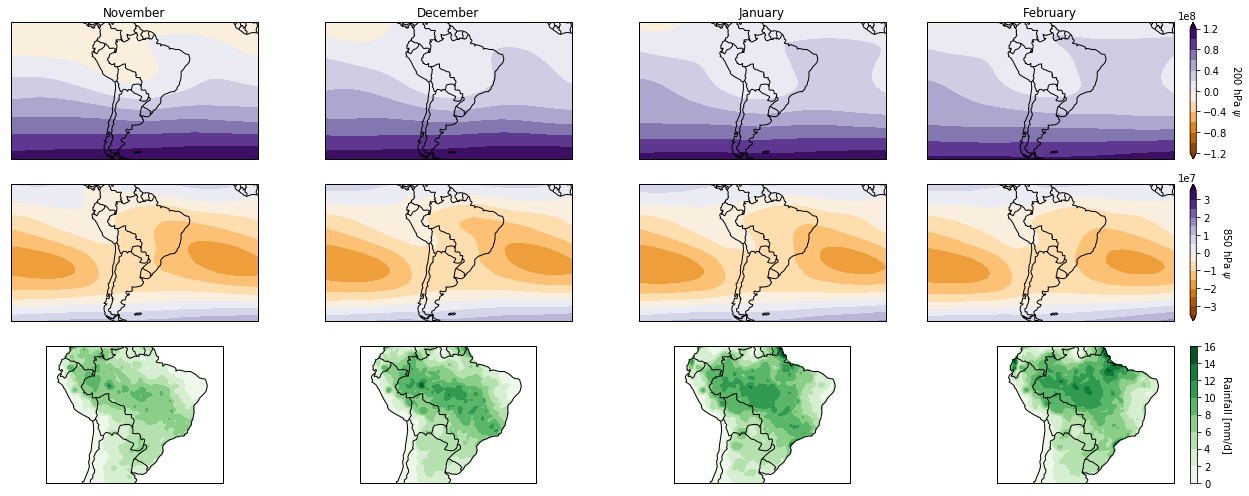

In [7]:
fig, axes = viz.SetupAxes(ncol = ncols, nax = 3 * ncols, proj = ccrs.PlateCarree(), figsize = [18, 7])
for i,m in enumerate(months_plot):
    selector = lambda ds: ds.sel(month = m)

    # Row 1: 200 hPa wind
    ax = axes[0, i]
    ax.set_title('{}'.format(calendar.month_name[m]))
    C1 = ax.contourf(X, Y, selector(psi_200_c), transform = ccrs.PlateCarree(), 
                     cmap = cmap_streamfunc, levels=lev200, extend='both')
    if i == (ncols - 1):
        cbar1 = fig.colorbar(C1, ax = ax)
        cbar1.formatter.set_powerlimits((8, 8))
        cbar1.update_ticks()
        cbar1.set_label(r'200 hPa $\psi$', rotation=270)
        cbar1.ax.get_yaxis().labelpad = 15

    # Row 2: 850 hPa wind
    ax = axes[1, i]
    C2 = ax.contourf(X, Y, selector(psi_850_c), transform = ccrs.PlateCarree(), 
                     cmap = cmap_streamfunc, levels=lev850, extend="both")
    if i == (ncols - 1):
        cbar2 = fig.colorbar(C2, ax = ax)
        cbar2.formatter.set_powerlimits((7, 7))
        cbar2.update_ticks()
        cbar2.set_label(r'850 hPa $\psi$', rotation=270)
        cbar2.ax.get_yaxis().labelpad = 15

    # Row 3: Rainfall
    ax = axes[2, i]
    sub = selector(prcp_c).values
    sub = np.ma.masked_invalid(sub)
    C3 = ax.contourf(Xp, Yp, sub, transform = ccrs.PlateCarree(), cmap = cmap_rain, 
                     levels = np.linspace(0, 16, 9))
    if i == (ncols - 1):
        cbar3 = fig.colorbar(C3, ax = ax)
        cbar3.set_label(r'Rainfall [mm/d]', rotation=270)
        cbar3.ax.get_yaxis().labelpad = 15

viz.FormatAxes(axes[[0,1],:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, ticks=None)
viz.FormatAxes(axes[2,:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, extent = rain_extent, ticks=None)

if savefigs:
    fig.savefig("../_figs/Climatology.pdf", bbox_inches='tight')

## Anomalies NDJF 2015-16

In [8]:
filt = lambda ds: ds.sel(time = slice('2015-11-01', '2016-02-29')).groupby('time.month').mean(dim='time')
prcp = filt(xr.open_dataarray("../_data/rainfall/subset/cpc_raw.nc"))
prcpa = filt(xr.open_dataarray("../_data/rainfall/subset/cpc_anom.nc"))
psi_200a = filt(xr.open_dataarray("../_data/reanalysis/subset/streamfunc_200_anom.nc"))
psi_850a = filt(xr.open_dataarray("../_data/reanalysis/subset/streamfunc_850_anom.nc"))
psi_200 = filt(xr.open_dataarray("../_data/reanalysis/subset/streamfunc_200_raw.nc"))
psi_850 = filt(xr.open_dataarray("../_data/reanalysis/subset/streamfunc_850_raw.nc"))

In [9]:
X, Y = np.meshgrid(psi_200a.lon, psi_200a.lat)
Xp, Yp = np.meshgrid(prcpa.lon, prcpa.lat)
ncols = len(months_plot)

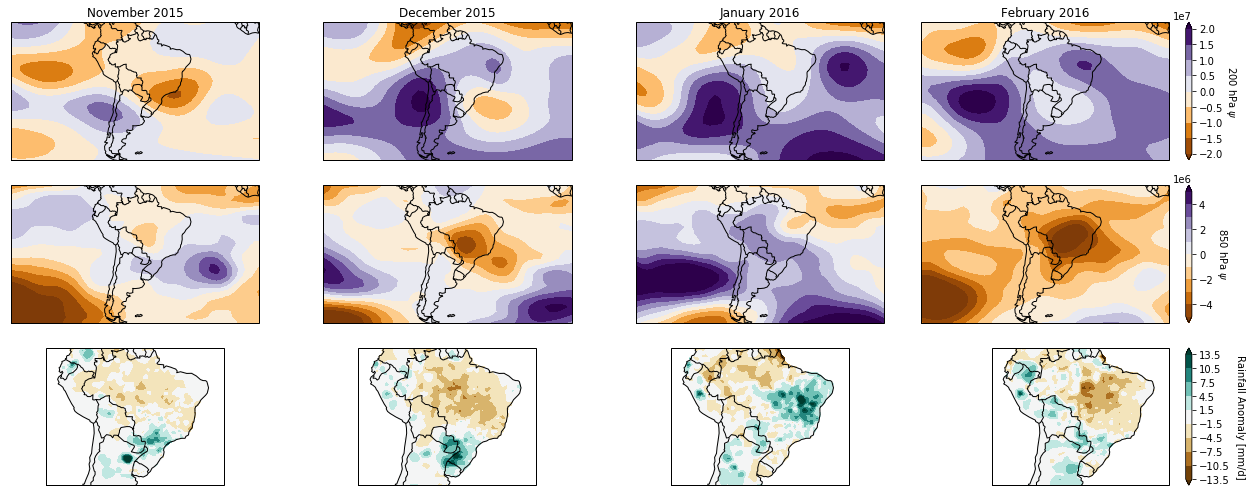

In [10]:
fig, axes = viz.SetupAxes(ncol = ncols, nax = 3 * ncols, proj = ccrs.PlateCarree(), figsize = [18, 7])
for i,m in enumerate(months_plot):
    selector = lambda ds: ds.sel(month = m)

    # Row 1: 200 hPa wind
    ax = axes[0, i]
    ax.set_title('{} {}'.format(calendar.month_name[m], years_plot[i]))
    C1 = ax.contourf(X, Y, selector(psi_200a), transform = ccrs.PlateCarree(),
                     cmap = cmap_streamfunc, levels=np.linspace(-2e7, 2e7, 9), extend='both')
    #ax.contour(X, Y, selector(psi_200), transform = ccrs.PlateCarree(),
    #          colors='k', levels=lev200)
    if i == (ncols - 1):
        cbar1 = fig.colorbar(C1, ax = ax)
        cbar1.formatter.set_powerlimits((7, 7))
        cbar1.update_ticks()
        cbar1.set_label(r'200 hPa $\psi$', rotation=270)
        cbar1.ax.get_yaxis().labelpad = 15

    # Row 2: 850 hPa wind
    ax = axes[1, i]
    C2 = ax.contourf(X, Y, selector(psi_850a), transform = ccrs.PlateCarree(), 
                     cmap = cmap_streamfunc, levels=np.linspace(-5e6, 5e6, 11), extend='both')
    #ax.contour(X, Y, selector(psi_850), transform = ccrs.PlateCarree(),
    #          colors='k', levels=lev850)
    if i == (ncols - 1):
        cbar2 = fig.colorbar(C2, ax = ax)
        cbar2.formatter.set_powerlimits((6, 6))
        cbar2.update_ticks()
        cbar2.set_label(r'850 hPa $\psi$', rotation=270)
        cbar2.ax.get_yaxis().labelpad = 15

    # Row 3: Rainfall
    ax = axes[2, i]
    sub = selector(prcpa).values
    sub = np.ma.masked_invalid(sub)
    C3 = ax.contourf(Xp, Yp, sub, transform = ccrs.PlateCarree(), cmap = cmap_raina, 
                     levels = np.linspace(-13.5, 13.5, 10), extend = "both")
    if i == (ncols - 1):
        cbar3 = fig.colorbar(C3, ax = ax)
        cbar3.set_label(r'Rainfall Anomaly [mm/d]', rotation=270)
        cbar3.ax.get_yaxis().labelpad = 15

# Coasts and Countries
viz.FormatAxes(axes[[0,1],:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, ticks=None)
viz.FormatAxes(axes[2,:], coast=True, grid=False, border=True, river = False,
               feature_list = [], states=False, extent = rain_extent, ticks=None)

# Save to File
if savefigs:
    fig.savefig("../_figs/NDJF201516Anomaly.pdf", bbox_inches='tight')